In [1]:
import requests
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress
from api_keys import twitter_apikey
from api_keys import bearer

In [2]:
soap_url = 'https://api.apify.com/v2/datasets/CcFU8d7BHFl20MBNv/items?clean=true&format=json'
gloves_url = 'https://api.apify.com/v2/datasets/BWATRBhazOo2vdjmB/items?clean=true&format=json'
mask_sanitizer_url = 'https://api.apify.com/v2/datasets/I1O7OHB5HWmR2mSIq/items?clean=true&format=json'

data1 = requests.get(soap_url).json()
data2 = requests.get(gloves_url).json()
data3 = requests.get(mask_sanitizer_url).json()

In [3]:
df1 = pd.DataFrame(data1)
df1 = df1.drop(df1.columns[0], axis=1)
df1 = df1.T
df1 = df1.reset_index()
df1.columns = ['Date', 'Hand Soap']
df1.head()

,Date,Hand Soap
0,"Feb 11, 2018",15
1,"Feb 18, 2018",13
2,"Feb 25, 2018",13
3,"Mar 4, 2018",19
4,"Mar 11, 2018",11


In [4]:
df2 = pd.DataFrame(data2)
df2 = df2.drop(df2.columns[0], axis=1)
df2 = df2.T
df2 = df2.reset_index()
df2.columns = ['Date', 'Latex Gloves']
df2.head()

,Date,Latex Gloves
0,"Feb 11, 2018",8
1,"Feb 18, 2018",8
2,"Feb 25, 2018",4
3,"Mar 4, 2018",3
4,"Mar 11, 2018",16


In [5]:
df3 = pd.DataFrame(data3)
df3 = df3.drop(df3.columns[0], axis=1)
df3 = df3.T
df3 = df3.reset_index()
df3.columns = ['Date', 'Face Mask', 'Hand Sanitizer']
df3.head()

,Date,Face Mask,Hand Sanitizer
0,"Feb 11, 2018",6,1
1,"Feb 18, 2018",6,1
2,"Feb 25, 2018",6,1
3,"Mar 4, 2018",7,1
4,"Mar 11, 2018",7,1


In [6]:
df4 = pd.merge(df1,df2, on='Date')
df4.reset_index(drop=True, inplace= True)
df4.head()

,Date,Hand Soap,Latex Gloves
0,"Feb 11, 2018",15,8
1,"Feb 18, 2018",13,8
2,"Feb 25, 2018",13,4
3,"Mar 4, 2018",19,3
4,"Mar 11, 2018",11,16


In [7]:
complete_df = pd.merge(df3,df4, on='Date')
complete_df.reset_index(drop=True, inplace= True)
complete_df.head()

,Date,Face Mask,Hand Sanitizer,Hand Soap,Latex Gloves
0,"Feb 11, 2018",6,1,15,8
1,"Feb 18, 2018",6,1,13,8
2,"Feb 25, 2018",6,1,13,4
3,"Mar 4, 2018",7,1,19,3
4,"Mar 11, 2018",7,1,11,16


In [8]:
complete_df['Date'] = pd.to_datetime(complete_df['Date'], format='%b %d, %Y')

# set the "Date" column as the index of the dataframe
complete_df.set_index('Date', inplace=True)
complete_df

,Face Mask,Hand Sanitizer,Hand Soap,Latex Gloves
Date,,,,
2018-02-11,6,1,15,8
2018-02-18,6,1,13,8
2018-02-25,6,1,13,4
2018-03-04,7,1,19,3
2018-03-11,7,1,11,16
...,...,...,...,...
2023-01-01,7,1,26,5
2023-01-08,5,2,27,9
2023-01-15,6,2,29,18


In [9]:
complete_df = complete_df[['Face Mask', 'Hand Sanitizer', 'Hand Soap', 'Latex Gloves']].astype(int)

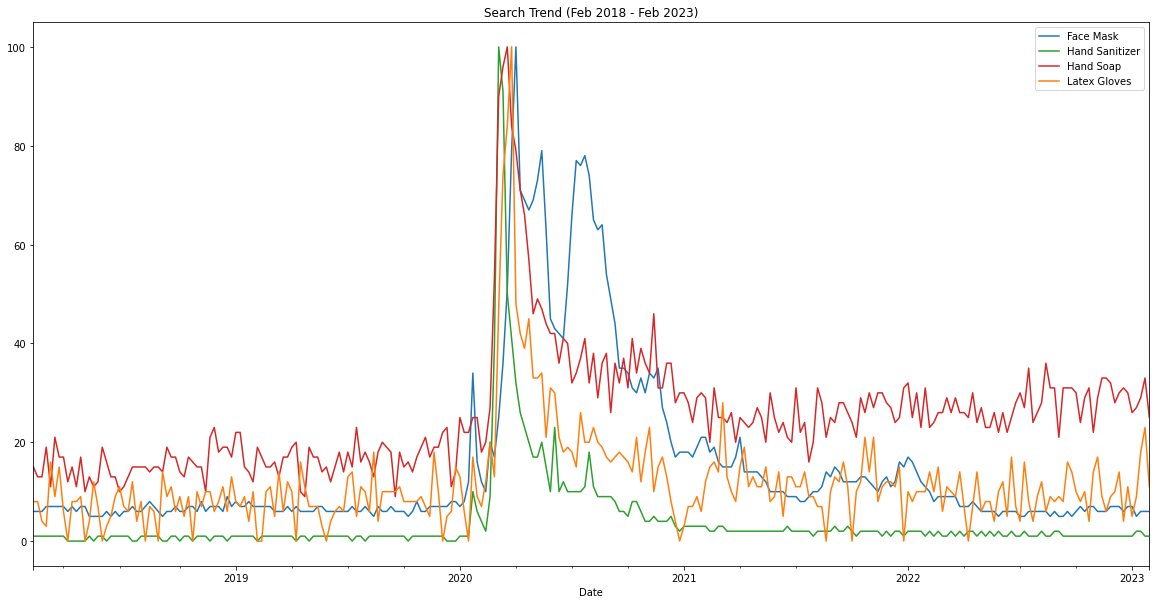

In [98]:
complete_df.plot(kind='line', figsize=(20,10), title='Search Trend (Feb 2018 - Feb 2023)', color=['C0','C2', 'C3', 'C1'])
plt.savefig('figures/all_items.png')

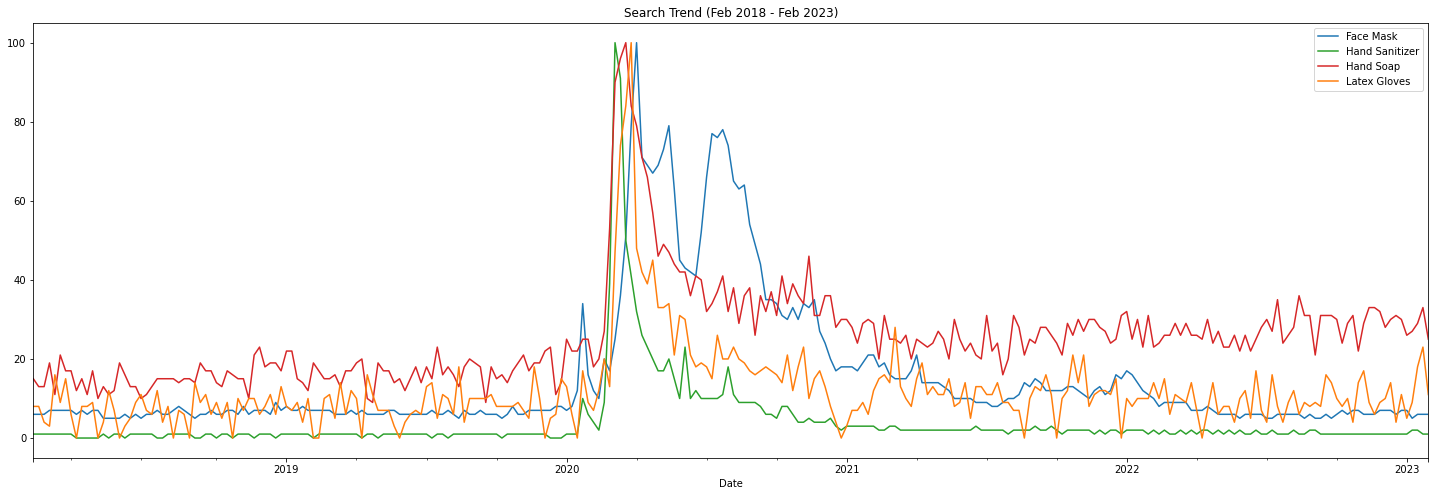

In [101]:
complete_df.plot(kind='line', figsize=(25,8), title='Search Trend (Feb 2018 - Feb 2023)', color=['C0','C2', 'C3', 'C1'])
plt.savefig('figures/all_items1.png')

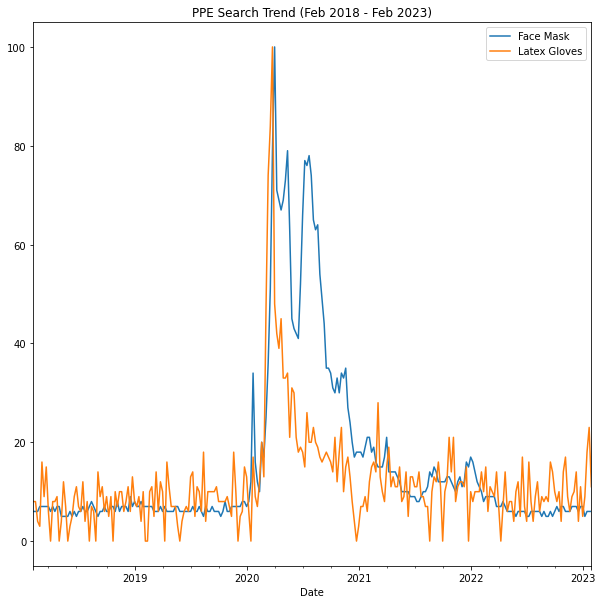

In [94]:
ppe_df = complete_df[['Face Mask', 'Latex Gloves']]
ppe_df.plot(kind='line', figsize=(10,10), title='PPE Search Trend (Feb 2018 - Feb 2023)')
plt.savefig('figures/ppe_fig1.png')

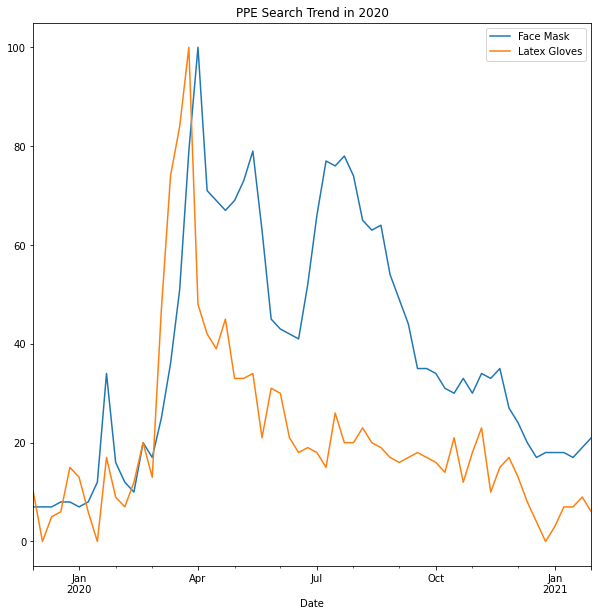

In [95]:
start_date = pd.to_datetime('2019-11-30')
end_date = pd.to_datetime('2021-02-01')
ppe_zoomed = ppe_df[(ppe_df.index >= start_date) & (ppe_df.index <= end_date)]
ppe_zoomed.plot(kind='line', figsize=(10,10), title='PPE Search Trend in 2020')
plt.savefig('figures/ppe_fig2.png')

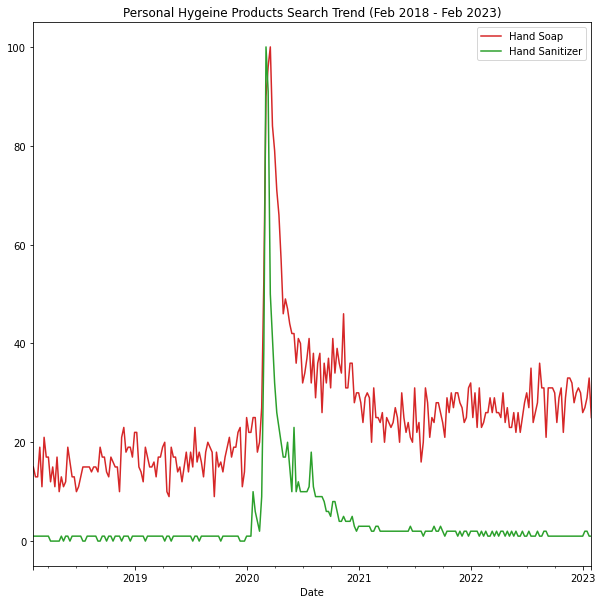

In [93]:
personal_hygiene_df = complete_df[['Hand Soap', 'Hand Sanitizer']]
personal_hygiene_df.plot(kind='line', figsize=(10,10), title='Personal Hygeine Products Search Trend (Feb 2018 - Feb 2023)', color=['C3','C2'])
plt.savefig('figures/ph_fig1.png')

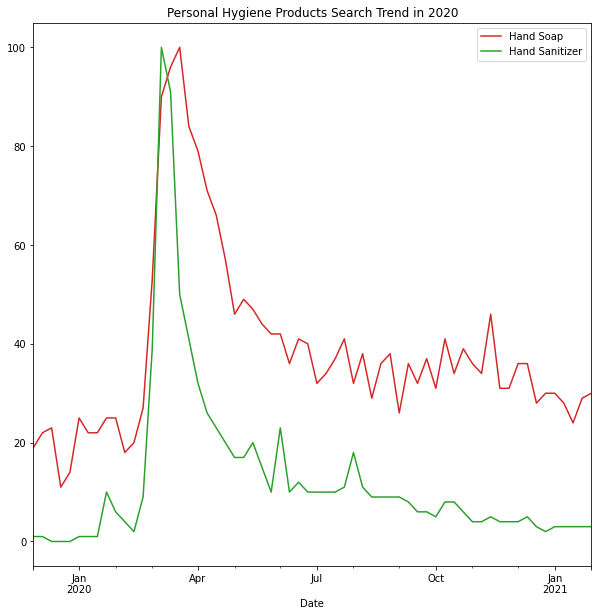

In [96]:
personal_hygiene_zoomed = personal_hygiene_df[(personal_hygiene_df.index >= start_date) & (personal_hygiene_df.index <= end_date)]
personal_hygiene_zoomed.plot(kind='line', figsize=(10,10), title='Personal Hygiene Products Search Trend in 2020', color=['C3','C2'])
plt.savefig('figures/ph_fig2')

In [71]:
date0 = pd.to_datetime('2019-01-25')
date1 = pd.to_datetime('2020-01-26')
pre_df = complete_df[(complete_df.index >= date0) & (complete_df.index <= date1)]
pre_df.head()

,Face Mask,Hand Sanitizer,Hand Soap,Latex Gloves
Date,,,,
2019-01-27,8,1,14,4
2019-02-03,7,1,12,10
2019-02-10,7,0,19,0
2019-02-17,7,1,17,0
2019-02-24,7,1,15,10


In [86]:
mean1 = pre_df.mean()
mean1

Face Mask          7.150943
Hand Sanitizer     1.000000
Hand Soap         16.905660
Latex Gloves       8.132075
dtype: float64

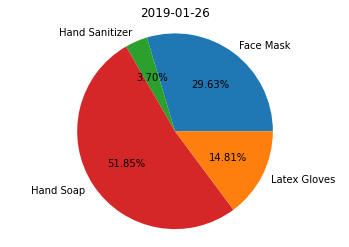

In [110]:
values0 = pre_df.iloc[0].values
labels = pre_df.columns

plt.pie(values0, labels=labels, autopct='%.2f%%',  colors=['C0','C2', 'C3', 'C1'])
plt.title('2019-01-26')
plt.axis('equal')
plt.savefig('figures/pie0')

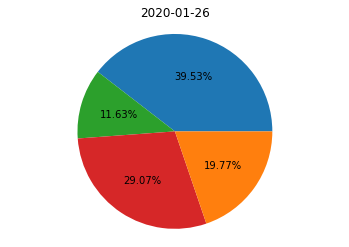

In [106]:
values1 = pre_df.iloc[-1].values

plt.pie(values1, autopct='%.2f%%',  colors=['C0','C2', 'C3', 'C1'])
plt.title('2020-01-26')
plt.axis('equal')
plt.savefig('figures/pie1')

In [90]:
date_during1 = pd.to_datetime('2020-01-27')
date_during2 = pd.to_datetime('2021-01-23')
during_df = complete_df[(complete_df.index >= date_during1) & (complete_df.index <= date_during2)]
during_df.mean()

Face Mask         44.686275
Hand Sanitizer    15.176471
Hand Soap         42.274510
Latex Gloves      23.803922
dtype: float64

In [76]:
date2 = pd.to_datetime('2021-01-24')
date3 = pd.to_datetime('2022-01-23')
post_df = complete_df[(complete_df.index >= date2) & (complete_df.index <= date3)]
post_df.tail()

,Face Mask,Hand Sanitizer,Hand Soap,Latex Gloves
Date,,,,
2021-12-26,15,1,31,0
2022-01-02,17,2,32,10
2022-01-09,16,2,25,8
2022-01-16,14,2,30,10
2022-01-23,12,2,23,10


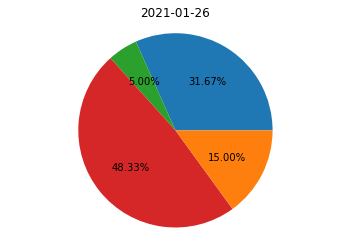

In [109]:
values2 = post_df.iloc[0].values

plt.pie(values2, autopct='%.2f%%', colors=['C0','C2', 'C3', 'C1'])
plt.title('2021-01-26')
plt.axis('equal')
plt.savefig('figures/pie2')

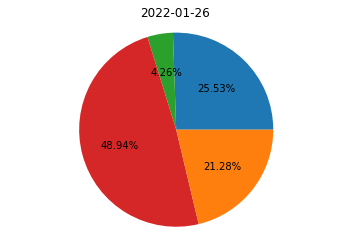

In [108]:
values3 = post_df.iloc[-1].values

plt.pie(values3, autopct='%.2f%%', colors=['C0','C2', 'C3', 'C1'])
plt.title('2022-01-26')
plt.axis('equal')
plt.savefig('figures/pie3')

Hand Soap
    - elevated search levels pre vs post covid
        - compare spread of data, mean of pre and post
        
Face mask 
    - big spikes and prolonged elevated search level
        - probabily due to controversy
        
Hand sanitizer 
    - least popular of all three
    - compare with the controversy around face mask
        